In [1]:
import os
import sys
import itertools
import numpy as np

import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import graphviz
import torchviz
import torchview

sys.path.append("/home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee")
from src.setup import setup_python, setup_pytorch
from src.dataset import RGBDObjectDataset
from src.models import TestCNN, TestAutoencoder, CombinedModel

/home/self_supervised_learning_gr/self_supervised_learning/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
setup_python()

sys.version = 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
os.getcwd() = /home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee


In [3]:
DEVICE = setup_pytorch()

torch.__version__ = 1.12.1+cu113
torch.backends.cudnn.version() = 8302
torch.version.cuda = 11.3
DEVICE = cuda:0


In [4]:
INPUT_SIZE = (256,256)
BATCH_SIZE = 10
TRANSFORMATION = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(size=INPUT_SIZE)])

dataset = RGBDObjectDataset(path="data/RGB-D_Object/rgbd-dataset",
                            mode="train",
                            transformation=TRANSFORMATION,
                            nb_samples=100)

data_loader = DataLoader(dataset=dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=True)

In [5]:
# model = TestCNN().to(DEVICE)
model = TestAutoencoder().to(DEVICE)
# model = CombinedModel().to(DEVICE)
print(model)

TestAutoencoder(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1_1): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv1_2): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv2_1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3_1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4_1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (fc_1): Linear(in_features=32768, out_features=512, bias=True)
  (fc_2): Linear(in_features=512, out_features=256, bias=True)
  (fc_3): Linear(in_features=256, out_features=32768, bias=True)
  (upsample): Upsample(scale_factor=2.0, mode=nearest)
  (tconv1_1): Conv

# Torchviz

In [6]:
# # Load and prepare batch
# rgb, depth, mask, loc_x, loc_y, label = next(iter(data_loader))
# rgb = rgb.to(DEVICE)
# depth = depth.to(DEVICE)
# mask = mask.to(DEVICE)
# loc_x = loc_x.to(DEVICE)
# loc_y = loc_y.to(DEVICE)
# label = label.to(DEVICE)

# y = model(rgb)

# torchviz.make_dot(y.mean(), params=dict(model.named_parameters()))

# Torchview

x torch.Size([10, 32, 512, 512])


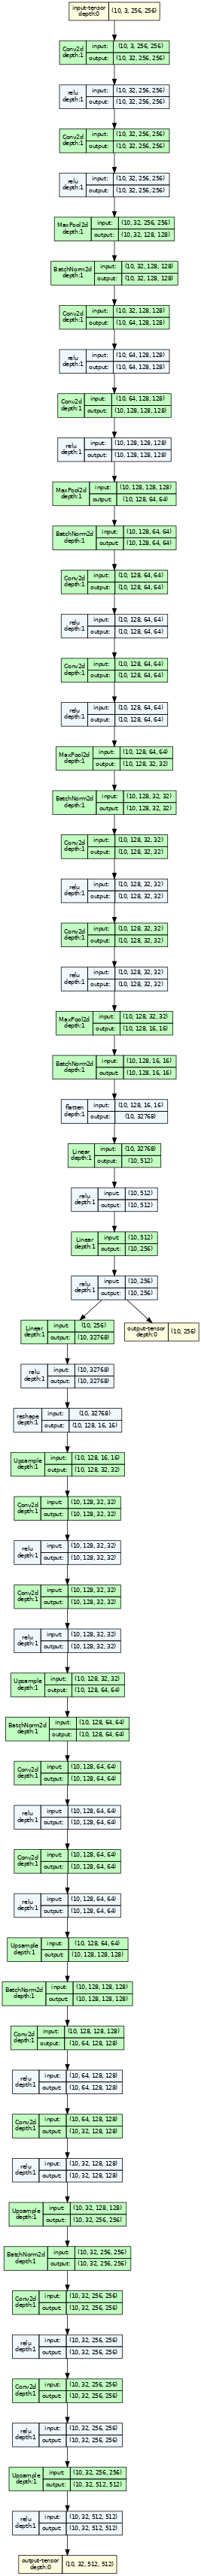

: 

In [6]:
graphviz.set_jupyter_format('png')
graph = torchview.draw_graph(model, input_size=(BATCH_SIZE, 3, INPUT_SIZE[0], INPUT_SIZE[1]), device=DEVICE,
                             save_graph=True, filename="test", directory="train_results")
# graph.resize_graph(scale=0.5)
graph.visual_graph